In [4]:
#importing libraries
import yfinance as yfin  #YahouFinance  
import numpy as npy     #multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import pandas as pd     #Data manipulation and analysis
import matplotlib as mpl  # numerical mathematics extension NumPy.
import matplotlib.pyplot as plt  # creating static, animated, and interactive visualizations
import scipy.stats as si  # Large number of probability distributions, summary and frequency statistics
from mpl_toolkits.mplot3d import Axes3D #Generating 3D plot
import os #provides functions for interacting with the operating system

In [5]:
initial_data = yfin.download("MRNA ^VIX", start="2020-11-10", end="2021-11-10") #importing data from yahoo finance for MODERNA

[*********************100%***********************]  2 of 2 completed


Checking the Data

In [6]:
initial_data.head()  # this shows the first 5 days of MODERNA Stock Data

Adj Close                 Close                   High             \
                 MRNA       ^VIX       MRNA       ^VIX        MRNA       ^VIX   
Date                                                                            
2020-11-10  76.050003  24.799999  76.050003  24.799999   80.379997  26.770000   
2020-11-11  82.440002  23.450001  82.440002  23.450001   83.980003  25.120001   
2020-11-12  87.809998  25.350000  87.809998  25.350000   87.930000  27.270000   
2020-11-13  89.389999  23.100000  89.389999  23.100000   90.529999  25.030001   
2020-11-16  97.949997  22.450001  97.949997  22.450001  103.199997  24.080000   

                  Low                   Open               Volume       
                 MRNA       ^VIX        MRNA       ^VIX      MRNA ^VIX  
Date                                                                    
2020-11-10  73.519997  24.350000   80.000000  25.360001  10499400    0  
2020-11-11  76.129997  22.570000   77.050003  25.010000  18576500    0  
2020-11-12  83.830002  23.530001   85.180000  24.389999  21700100    0  
2020-11-13  85.220001  22.740000   86.620003  24.940001  14121100    0  
2020-11-16  93.300003  22.430000  100.309998  23.660000  70853100    0

In [7]:
initial_data.tail() # this shows the last 5 days of MODERNA Stock Data

Adj Close                  Close                   High  \
                  MRNA       ^VIX        MRNA       ^VIX        MRNA   
Date                                                                   
2021-11-03  345.920013  15.100000  345.920013  15.100000  350.100006   
2021-11-04  284.019989  15.440000  284.019989  15.440000  297.730011   
2021-11-05  236.990005  16.480000  236.990005  16.480000  246.100006   
2021-11-08  244.679993  17.219999  244.679993  17.219999  245.919998   
2021-11-09  236.850006  17.780001  236.850006  17.780001  250.570007   

                              Low                   Open               Volume  \
                 ^VIX        MRNA       ^VIX        MRNA       ^VIX      MRNA   
Date                                                                            
2021-11-03  16.389999  336.200012  14.900000  350.000000  16.110001   6447800   
2021-11-04  16.139999  278.000000  14.730000  295.809998  15.060000  30967700   
2021-11-05  17.020000  210.960007  14.950000  241.570007  15.590000  59299200   
2021-11-08  17.690001  233.059998  16.440001  233.059998  17.230000  14606800   
2021-11-09  18.570000  232.210007  17.209999  246.070007  17.430000  10960300   

                 
           ^VIX  
Date             
2021-11-03    0  
2021-11-04    0  
2021-11-05    0  
2021-11-08    0  
2021-11-09    0

In [8]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-11-10 to 2021-11-09
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MRNA    252 non-null    float64
 1   ^VIX    252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [9]:
data.head()

,MRNA,^VIX
Date,,
2020-11-10,76.050003,24.799999
2020-11-11,82.440002,23.450001
2020-11-12,87.809998,25.350000
2020-11-13,89.389999,23.100000
2020-11-16,97.949997,22.450001


In [10]:
data.tail()

,MRNA,^VIX
Date,,
2021-11-03,345.920013,15.100000
2021-11-04,284.019989,15.440000
2021-11-05,236.990005,16.480000
2021-11-08,244.679993,17.219999
2021-11-09,236.850006,17.780001


Text(0.5, 1.0, 'MODERNA STOCK PRICE 2020-11-10 to 2021-11-10')

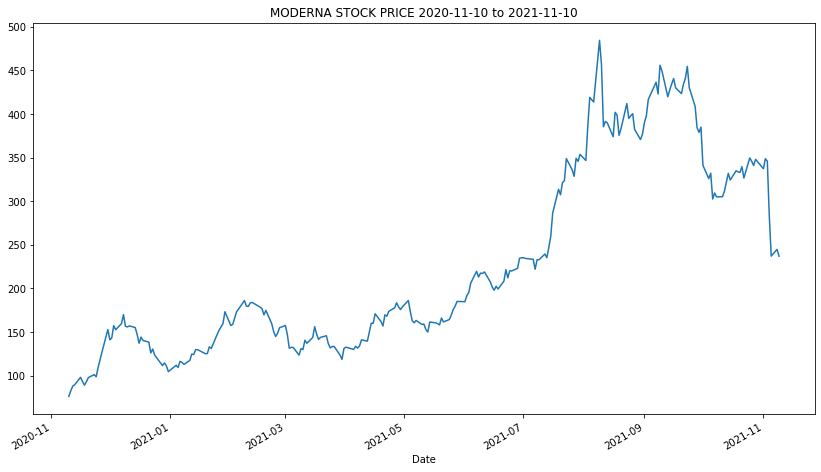

In [11]:
data["MRNA"].plot(figsize=(14, 8), subplots=True) # The graph for the movement of Moderna Stock Price
plt.title('MODERNA STOCK PRICE 2020-11-10 to 2021-11-10')

### Volatility Index

In [12]:
log_return = npy.log(data['MRNA'] / data['MRNA'].shift(1))

In [13]:
vol = npy.sqrt(252) * log_return.std()
print('The annualised volatility is ', round(vol*100,2), '%')

The annualised volatility is  83.07 %


In [14]:
VIX= data["^VIX"][-1]
print('The market volatility is ', round(VIX,2), '%')

The market volatility is  17.78 %


### Rolling Statistics

In [15]:
sym = 'MRNA'   
data = pd.DataFrame(data[sym]).dropna()
data.tail()

,MRNA
Date,
2021-11-03,345.920013
2021-11-04,284.019989
2021-11-05,236.990005
2021-11-08,244.679993
2021-11-09,236.850006


In [16]:
window = 10   # 2 weeks moving average is considered
data['min'] = data[sym].rolling(window=window).min()
data['mean'] = data[sym].rolling(window=window).mean()
data['std'] = data[sym].rolling(window=window).std()
data['median'] = data[sym].rolling(window=window).median()
data['max'] = data[sym].rolling(window=window).max()
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
data.dropna().tail().round(2)

,MRNA,min,mean,std,median,max,ewma
Date,,,,,,,
2021-11-03,345.92,326.54,342.72,6.99,345.47,349.56,346.01
2021-11-04,284.02,284.02,337.16,19.91,345.47,349.56,299.52
2021-11-05,236.99,236.99,328.21,37.54,345.47,349.56,252.62
2021-11-08,244.68,236.99,317.72,44.85,343.04,348.64,246.67
2021-11-09,236.85,236.85,306.83,50.19,339.03,348.64,239.30


Text(0.5, 1.0, 'MODERNA STOCK PRICE STATISTICS')

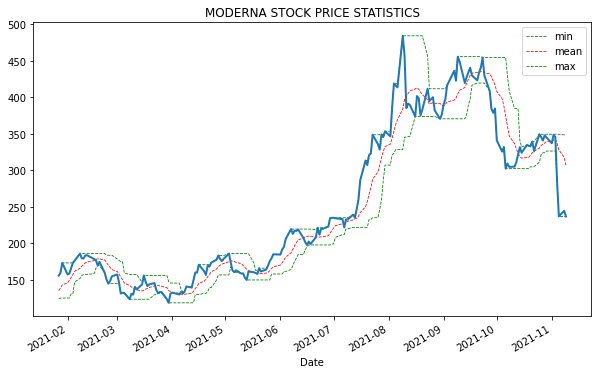

In [17]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);
plt.title('MODERNA STOCK PRICE STATISTICS')

In [18]:
data['SMA1'] = data[sym].rolling(window=10).mean() #2 & 3 weeks moving averages comparing with stock price of MODERNA
data['SMA2'] = data[sym].rolling(window=20).mean()
data[[sym, 'SMA1', 'SMA2']].tail()

,MRNA,SMA1,SMA2
Date,,,
2021-11-03,345.920013,342.715005,331.835002
2021-11-04,284.019989,337.160004,330.568002
2021-11-05,236.990005,328.205003,327.172002
2021-11-08,244.679993,317.717003,324.151002
2021-11-09,236.850006,306.828004,320.437002


Text(0.5, 1.0, 'MODERNA STOCK PRICE MOVING AVERAGES')

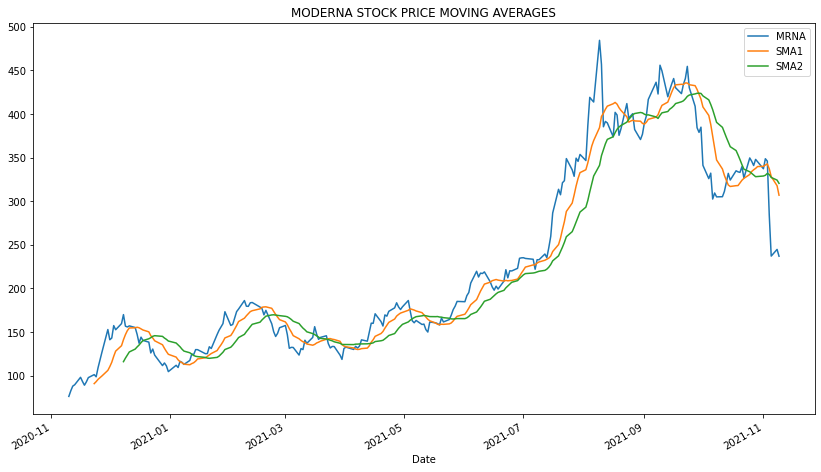

In [19]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(14, 8))
plt.title('MODERNA STOCK PRICE MOVING AVERAGES')

# Option Pricing Methodologies

## 1-Monte-Carlo Simulation

In [20]:
def mcs_simulation_npy(p):
    M = p
    I = p
    dt = T / M 
    S = npy.zeros((M + 1, I))
    S[0] = S0 
    rn = npy.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * npy.exp((r - sigma ** 2 / 2) * dt + sigma * npy.sqrt(dt) * rn[t]) 
    return S

In [21]:
T = 1.0   #time to maturity is 1 year
r = 0.0138 #10 years treasury rate is used for risk free rate 
sigma = 0.8307 #Stock Volatility
S0 = 236.85 #Spot price
K = 255.50 #Strike price

In [22]:
S = mcs_simulation_npy(10000)

In [23]:
S = npy.transpose(S)
S

array([[236.85      , 236.13276588, 237.06115614, ...,  90.31548704,
         91.0907392 ,  90.60094351],
       [236.85      , 238.24651864, 239.36673757, ..., 509.28730787,
        509.55909818, 506.03108206],
       [236.85      , 234.4567431 , 235.00147923, ..., 113.92712137,
        111.83508645, 113.33655325],
       ...,
       [236.85      , 238.99592564, 237.10340705, ...,  86.6869038 ,
         86.80479968,  87.23635042],
       [236.85      , 235.26329638, 236.48710018, ..., 239.71886069,
        239.29016242, 239.03872631],
       [236.85      , 239.62269744, 234.7861133 , ..., 399.15969234,
        395.31870959, 404.026402  ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

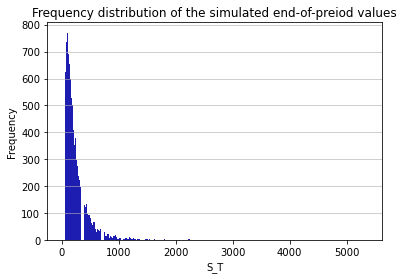

In [24]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.9, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [25]:
p = npy.mean(npy.maximum(K - S[:,-1],0))
print('Moderna European put', str(p))

Moderna European put 87.88668351453738


## 2-BLACK-SCHOLES

In [1]:
def euro_option_blsc(S, K, T, r, vol, CP):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #CP: call or put
    
    d1 = (npy.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    d2 = (npy.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    if CP == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * npy.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif CP == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * npy.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [18]:
P=euro_option_blsc(236.85, 255.50, 1, 0.0138, 0.8307, 'put')
print("MODERNA European put is", str(P))

MODERNA European put is 86.51343232119424


# The Greeks

## Delta

In [61]:
def delta(S, K, T, r, d, vol, CP):
    
    d1 = (npy.log(S / K) + (r - d + 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    if CP == "put":
        delta =  - npy.exp(-d * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [62]:
D=delta(236.85, 255.50, 1, 0.0138, 0.0,0.8307, 'put')
print("The value of Delta is",str(D) )

The value of Delta is -0.3666572988424489


In [71]:
S = npy.linspace(20,600,51)
Delta_Put = npy.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 255.50, 1, 0.0138, 0.0,0.8307, 'put')

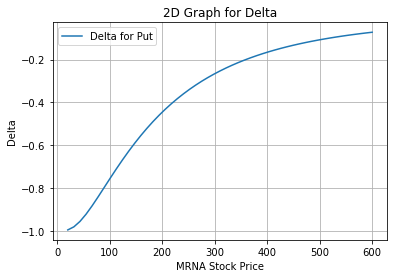

In [72]:
fig = plt.figure()
plt.plot(S, Delta_Put, '-')
plt.grid()
plt.xlabel('MRNA Stock Price')
plt.ylabel('Delta')
plt.title('2D Graph for Delta')
plt.legend(['Delta for Put'])

In [69]:
S = npy.linspace(20, 500, 51)
T = npy.linspace(0.5, 1.5, 51)
Delta = npy.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 255.50, T[i], 0.0138, 0.0, 0.8307, 'put')

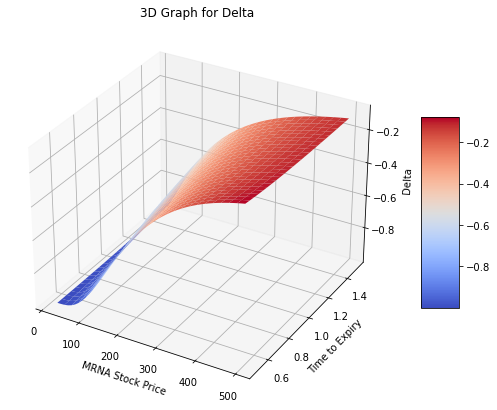

In [70]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')
S, T = npy.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('MRNA Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
plt.title('3D Graph for Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Gamma

In [59]:
def gamma(S, K, T, r, d, vol, CP):
    
    d1 = (npy.log(S / K) + (r - d + 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    gamma = npy.exp(-d * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * npy.sqrt(T))
    
    return gamma

In [60]:
g=gamma(236.85, 255.50, 1, 0.0138, 0.0,0.8307, 'put') 
print("The value of gamma is", str(g))

The value of gamma is 0.0019133034737458658


In [65]:
S = npy.linspace(20,500,51)
Gamma = npy.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 255.50, 1, 0.0138, 0.0,0.8307, 'put')

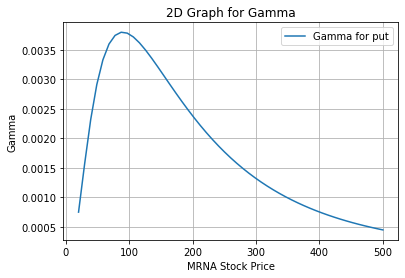

In [66]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('MRNA Stock Price')
plt.ylabel('Gamma')
plt.title('2D Graph for Gamma')
plt.legend(['Gamma for put'])

In [61]:
S = npy.linspace(20, 500, 51)
T = npy.linspace(0.5, 1.5, 51)
Gamma = npy.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 255.5, T[i], 0.0138, 0.0, 0.8307, 'put')


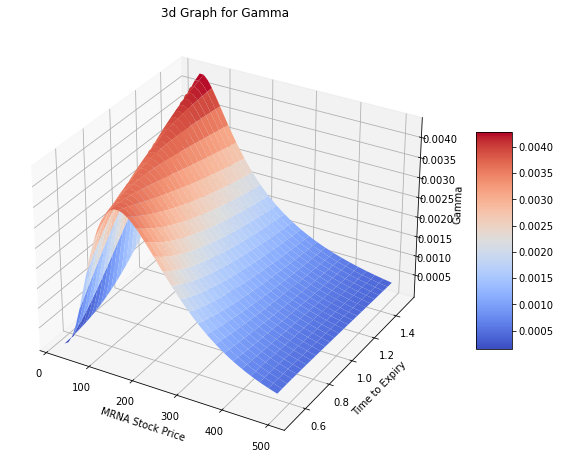

In [62]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
S, T = npy.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('MRNA Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
plt.title('3d Graph for Gamma')
fig.colorbar(surf, shrink=0.5, aspect=6);

### Speed

In [92]:
def speed(S, K, T, r, d, vol, CP):
    
    d1 = (npy.log(S / K) + (r - d + 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    speed = -npy.exp(-d * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * npy.sqrt(T)) * (d1 + vol * npy.sqrt(T))
    
    return speed

In [93]:
s=speed(236.85, 255.50, 1, 0.0138, 0.0,0.8307, 'put')
print("The value of Speed is", str(s))

The value of Speed is -1.1391444229677676e-05


In [59]:
S = npy.linspace(10,500,51)
Speed = npy.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 255.50, 1, 0.0138, 0.0,0.8307, 'put')

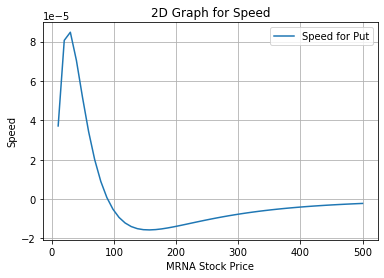

In [60]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('MRNA Stock Price')
plt.ylabel('Speed')
plt.title('2D Graph for Speed')
plt.legend(['Speed for Put'])

In [57]:
S = npy.linspace(20, 500, 51)
T = npy.linspace(0.5, 1.5, 51)
Speed = npy.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 255.50, T[i], 0.0138, 0.0,0.8307, 'put')

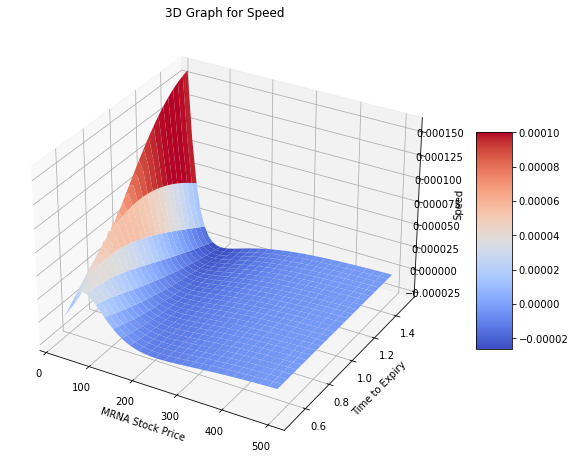

In [58]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
S, T = npy.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('MRNA Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
plt.title('3D Graph for Speed')
fig.colorbar(surf, shrink=0.5, aspect=6);


### Theta

In [111]:
def theta(S, K, T, r, d, vol, CP):
    
    d1 = (npy.log(S / K) + (r - d + 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    d2 = (npy.log(S / K) + (r - d - 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    if CP == "put":
        theta = -(vol * S * npy.exp(-d * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * npy.sqrt(T))) - d * S * npy.exp(-d * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * npy.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [112]:
t=theta(236.85, 255.50, 1, 0.0138, 0.0,0.8307, 'put')
print("The value of Theta is", str(t))

The value of Theta is -34.640698598523265


In [113]:
T = npy.linspace(0.25,1.5,50)
Theta_Put = npy.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(236.85, 255.50, T[i], 0.0138, 0.0, 0.8307, 'put')

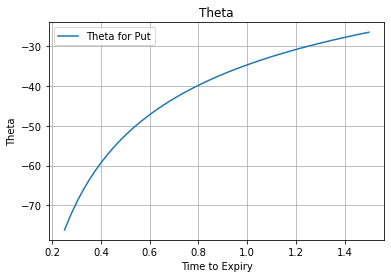

In [114]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend([ 'Theta for Put'])

In [115]:
S = npy.linspace(20, 500, 51)
T = npy.linspace(0.25, 1.5, 51)
Theta = npy.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 255.50, T[i], 0.0138, 0.02, 0.8307, 'put')

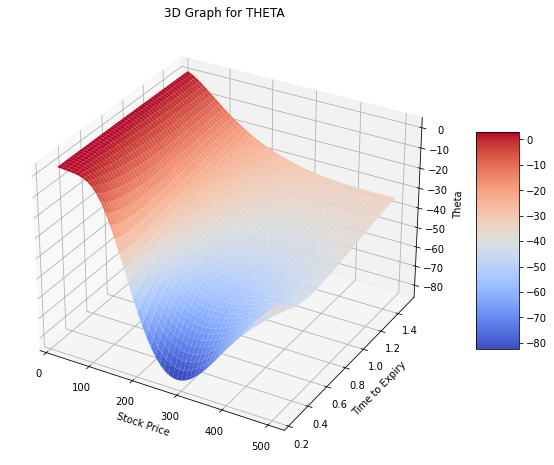

In [116]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
S, T = npy.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0.001, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
plt.title('3D Graph for THETA')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Vega

In [51]:
def vega(S, K, T, r, d, vol, CP):
    
    d1 = (npy.log(S / K) + (r - d + 0.5 * vol ** 2) * T) / (vol * npy.sqrt(T))
    vega = S * npy.sqrt(T) * npy.exp(-d * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [54]:
v=vega(236.85, 255.50, 1, 0.0138, 0.0,0.8307, 'put')
print("The value of vega is", str(v))

The value of vega is 89.1609831360088


In [47]:
vol = npy.linspace(0.01,1,51)
Vega = npy.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(236.85, 255.50, 1.0, 0.0138, 0.0, vol[i], 'put')

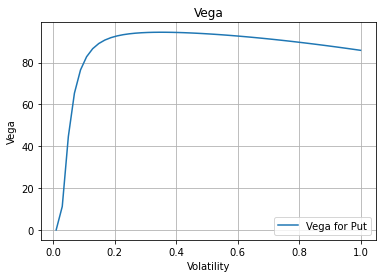

In [48]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

In [49]:
S = npy.linspace(50, 600, 51)
T = npy.linspace(0.5, 1.5, 51)
Vega = npy.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 255.50, T[i], 0.0138, 0.0, 0.8307, 'put')

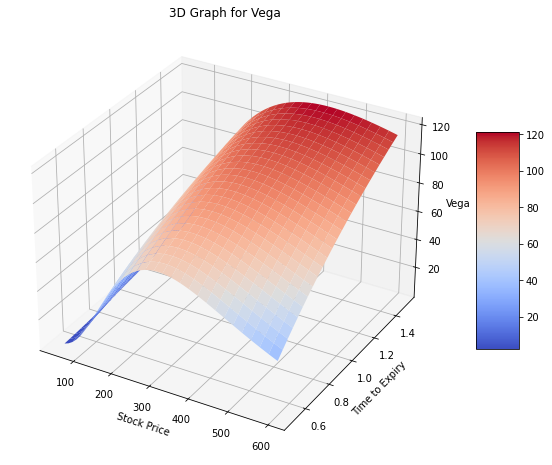

In [50]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
S, T = npy.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
plt.title('3D Graph for Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);